In [1]:
#Import libraries and set some options for displaying things
import numpy as np
import scipy.sparse as sp #may not be necessary
import scipy.sparse.linalg as sl #may not be necessary
import matplotlib.pyplot as plt
from numba import jit #Using jit to improve runtime. To install do conda install numba in cmd
import matplotlib.animation as animation #For making gifs, not required
#import ffmpeg #For gifs
import time
from numpy.linalg import norm
from mpl_toolkits import mplot3d

np.set_printoptions(linewidth=200, precision=3)
%run ../Utilities/Utilities.ipynb
%run Wave_fnc.ipynb
%matplotlib qt

## Some example plots for the 1D wave equation

In [2]:
#Obtain solution and axies
Solution, xaxis, haxis = wave1D(200,1000,1,boundary1, x0=0, X=1, t0=0, T=1)

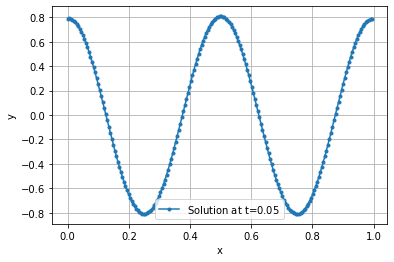

In [3]:
#Display a slice
displaySlice(xaxis,Solution.transpose(),50)

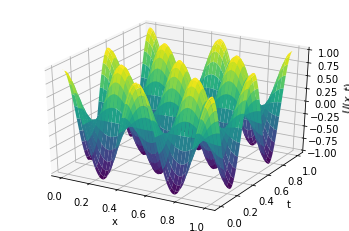

In [4]:
#Plot the solution in a 3d-plot
plot3D(Solution, xaxis, haxis, ylabel="t", zlabel="$U(x,t)$") #This function is obtained from Utilities.ipynb

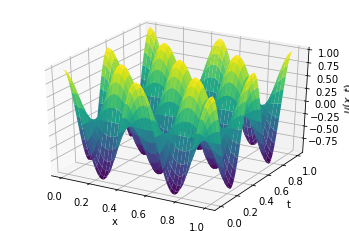

In [5]:
#Plot analytic solution
plot3D(solution1, xaxis, haxis, ylabel="t", zlabel="$u(x,t)$") #This function is obtained from Utilities.ipynb

### Errorplots b)

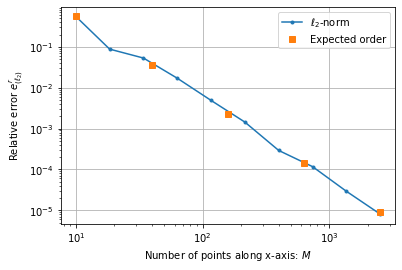

In [6]:
errorPlot1D(startIndex=1, endIndex = 3.4, evaluationPoints = 10, returnValues =False)

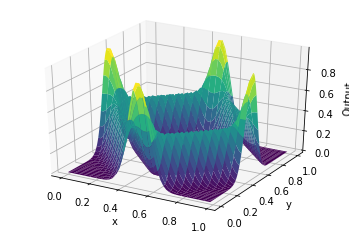

In [7]:
#Change initial condition to g(x)=exp(-100(x-1/2)^2) and h(x)=0
ret, xaxis, haxis = wave1D(50,1000,1,boundary2, x0=0, X=1, t0=0, T=1)
plot3D(ret, xaxis, haxis)

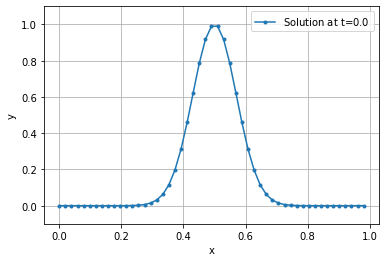

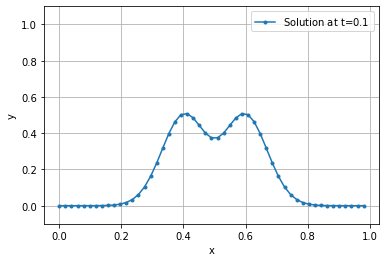

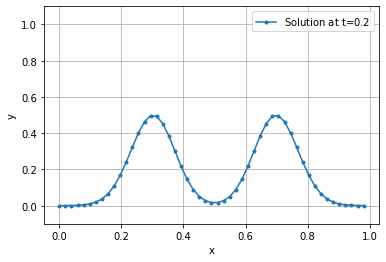

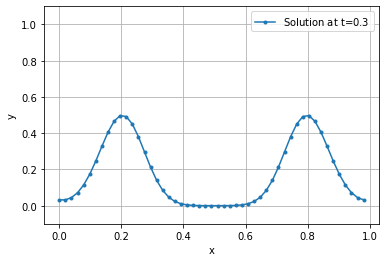

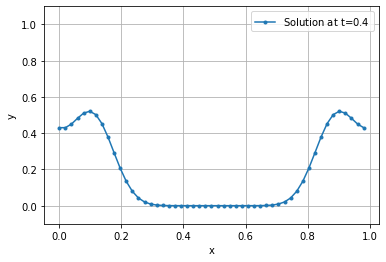

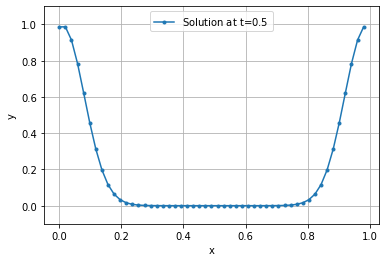

In [8]:
#Observe time development of solution. below is code used to create gif of solution.
#makeGIF1D(ret.T, xaxis, fps = 10, frn = 50, save=False): #Function to make gifs for the 1D wave equation.

timeframes = np.array([0,100,200,300,400,500])
#Here is code to make the plots of the time development
for t in timeframes:
    displaySlice(xaxis,ret.T, t, ylim = (-0.1,1.1))         #Slice of solution at timeframe t

**Describe time development of solution**



# Problem c)

In [9]:
#Make some plots of solution for different times t
numericSol, xaxis, yaxis, haxis, r  = wave2D(100,100,400, boundary3, 1, t0=0, T=1)


<ipython-input-1-fdc02693feb3>:27: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "solution3" failed type inference due to: Can't unify return type from the following types: array(float64, 1d, C), array(float64, 2d, C)
Return of: IR name '$82.37', type 'array(float64, 1d, C)', location: 
File "<ipython-input-1-fdc02693feb3>", line 31:
def solution3(x, y, t, c=1, mesh=True): #Analytic solution for task c. Returns mesh for plotting and error estimates
    <source elided>
        return np.outer(np.cos(4*np.pi*x),np.sin(4*np.pi*y))*np.cos(c*4*np.pi*t*np.sqrt(2))
    return np.cos(4*np.pi*x)*np.sin(4*np.pi*y)*np.cos(c*4*np.pi*t*np.sqrt(2))
    ^
Return of: IR name '$4.39', type 'array(float64, 2d, C)', location: 
File "<ipython-input-1-fdc02693feb3>", line 30:
def solution3(x, y, t, c=1, mesh=True): #Analytic solution for task c. Returns mesh for plotting and error estimates
    <source elided>
    if mesh:
        return np.outer(np.cos

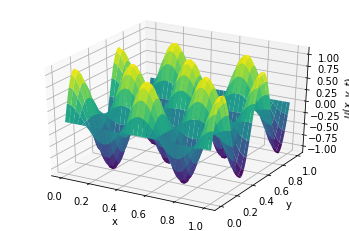

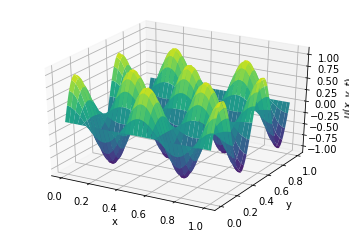

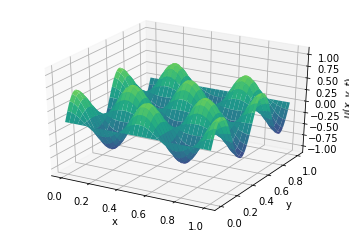

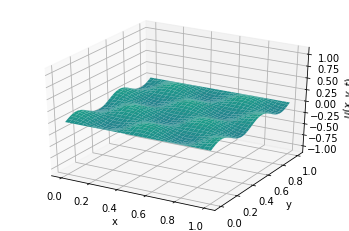

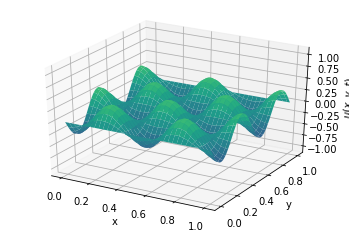

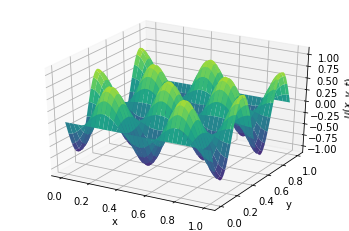

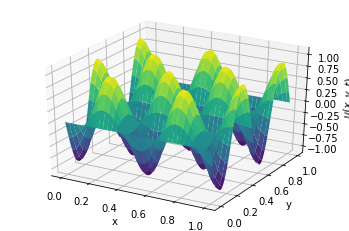

In [10]:
#Code below displays the solution at different times

timeframes = np.array([0, 11,22, 33,44, 55,66])
times = timeframes/400

#Here is code to make the plots of the time development
for t in times:
    displaySlice3d(xaxis,yaxis, solution3, t, zlim = (-1.1,1.1), vmin = -1, vmax = 1) # Displays numerical solution at timeframe t.

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


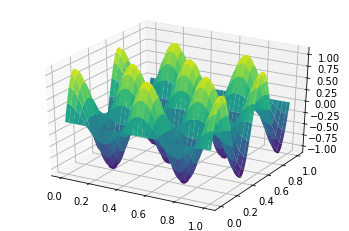

In [11]:
#In order to make gif or something
makeGIF2D(numericSol,xaxis,yaxis, save=True)

<ipython-input-1-fdc02693feb3>:27: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "solution3" failed type inference due to: Can't unify return type from the following types: array(float64, 1d, C), array(float64, 2d, C)
Return of: IR name '$82.37', type 'array(float64, 1d, C)', location: 
File "<ipython-input-1-fdc02693feb3>", line 31:
def solution3(x, y, t, c=1, mesh=True): #Analytic solution for task c. Returns mesh for plotting and error estimates
    <source elided>
        return np.outer(np.cos(4*np.pi*x),np.sin(4*np.pi*y))*np.cos(c*4*np.pi*t*np.sqrt(2))
    return np.cos(4*np.pi*x)*np.sin(4*np.pi*y)*np.cos(c*4*np.pi*t*np.sqrt(2))
    ^
Return of: IR name '$4.39', type 'array(float64, 2d, C)', location: 
File "<ipython-input-1-fdc02693feb3>", line 30:
def solution3(x, y, t, c=1, mesh=True): #Analytic solution for task c. Returns mesh for plotting and error estimates
    <source elided>
    if mesh:
        return np.outer(np.cos

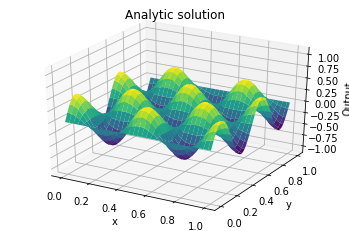

In [12]:
#Plot Analytic solution at timeframe 1
plot3D(solution3(xaxis,yaxis,1, 1),xaxis,yaxis, title="Analytic solution", zlim=(-1.1, 1.1))

<ipython-input-1-fdc02693feb3>:27: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "solution3" failed type inference due to: Can't unify return type from the following types: array(float64, 1d, C), array(float64, 2d, C)
Return of: IR name '$82.37', type 'array(float64, 1d, C)', location: 
File "<ipython-input-1-fdc02693feb3>", line 31:
def solution3(x, y, t, c=1, mesh=True): #Analytic solution for task c. Returns mesh for plotting and error estimates
    <source elided>
        return np.outer(np.cos(4*np.pi*x),np.sin(4*np.pi*y))*np.cos(c*4*np.pi*t*np.sqrt(2))
    return np.cos(4*np.pi*x)*np.sin(4*np.pi*y)*np.cos(c*4*np.pi*t*np.sqrt(2))
    ^
Return of: IR name '$4.39', type 'array(float64, 2d, C)', location: 
File "<ipython-input-1-fdc02693feb3>", line 30:
def solution3(x, y, t, c=1, mesh=True): #Analytic solution for task c. Returns mesh for plotting and error estimates
    <source elided>
    if mesh:
        return np.outer(np.cos

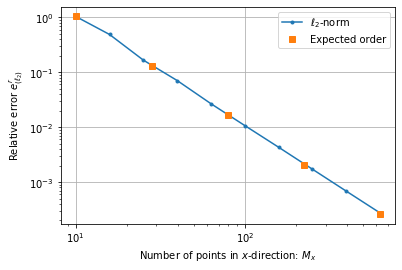

In [13]:
#Task c)

#In this task, one is going to make plots of relative l2 error in terms of h_x, where r_x = ch_x/k and h_x=h_y is fixed
#For solution at time t = 1

errorPlot2D(startIndex = 1, endIndex = 2.8, evaluationPoints = 10,returnValues=False)

## Problem d)

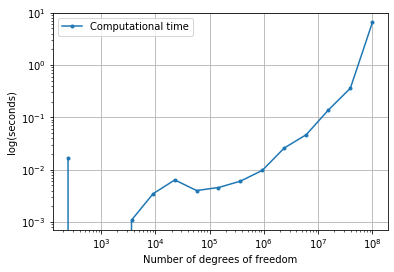

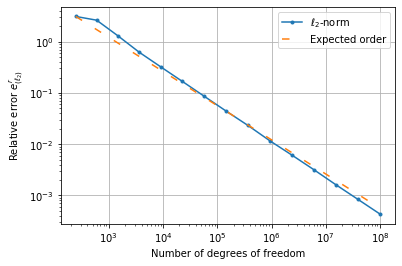

In [14]:

#Task d)

#M = np.linspace(5, 100, 10)
M = np.logspace(0.65, 2.5, 15)

#N = np.linspace(7, 102, 10)
N = np.logspace(0.7, 2.7, 15)

k = 1/((M+1)*2)

MNk = np.array([M, N, k]).T

#Plots the 
errorPlotNdof(MNk, returnValues = False, logscaleTime=True)